<a href="https://colab.research.google.com/github/math-pal/edu-tech/blob/main/impact_of_tech_on_edu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps for Exploratory Data Analysis (EDA):
1. Data Loading: Load the Excel file and inspect its structure.
2. Data Cleaning: Check for missing values, duplicates, and data types.
3. Descriptive Statistics: Generate summary statistics for each variable.
4. Target Variable Analysis: Analyze the distribution and characteristics of the target variable.
5. Feature Analysis: Explore relationships between the target variable and other features.
6. Correlation Analysis: Identify correlations between variables.
7. Visualization: Use various plots to visualize data distributions and relationships.

# Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
# import os
import re

# Step 1: Load the datasets

In [2]:
# import os
# print(os.getcwd())

e:\Post PhD Research\Supervision\BS\BEd-group\Analysis\edu-tech


In [138]:
# Load the Excel files
# df1 = pd.read_excel('questionnaire_aziza_maria.xlsx', sheet_name='Sheet2')
# df2 = pd.read_excel('quetionaire_naila_tahira_neha.xlsx', sheet_name='Sheet2')
# df3 = pd.read_excel('questionnaire_sheherbano.xlsx', sheet_name='Sheet2')
# df = pd.read_excel('combined_file.xlsx')

df = pd.read_excel('e:\Post PhD Research\Supervision\BS\BEd-group\Analysis\combined_file.xlsx')

In [ ]:
# # Concatenate the DataFrames
# df = pd.concat([df1, df2, df3])

In [ ]:
# # Save the combined DataFrame to a new Excel file
# df.to_excel('combined_file.xlsx', index=False)

### Examine the dataset

In [3]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

In [4]:
# Set pandas to display all rows
pd.set_option('display.max_rows', None)

In [42]:
# To check the shape of the dataframe
df.shape

(148, 31)

In [139]:
df.head()

,S.No,Role,Age,Gender,School_Name,School Location,District,Types of Technology Available,Frequency of Technology Use,Perceived Support of Learning Objectives by Technology,Benefits of Technology,Challenges and Limitations,Personalized Feedback Enhancement,Student Resistance to Technology,Change in Learning and Engagement,Motivation to Learn,Impact on Social Skills and Relationships,Adequacy for Students with Disabilities,Observed Changes in Learning,Support for Essential Skills Development,Promotion of Independence and Self-Directed Learning,Increase in Academic Performance,Improvement in Engagement and Learning,Challenges in Digital Literacy,Additional Technology or Resources Needed,Future Directions and Possibilities,Perceived Enhancement of Learning,Negative Effects of Screen Time,Positive Changes in Collaboration and Teamwork,Decrease in Traditional Teaching Methods,Need for Additional Teacher Training
0,1,Teacher,31.0,F,Government Boys High School,Aliabad,Hunza,"Computers, Internet, Educational Software.",Several times a week,NaN,NaN,NaN,Yes,No,NaN,Yes,NaN,No,Yes,NaN,Yes,Yes,Yes,Yes,NaN,NaN,2(slightly),Yes,No,No,Yes
1,2,Teacher,28.0,F,Government Boys High School,Aliabad,Hunza,"Computers, internet,LED.",Montly,Technology can help teachers and students in effective learning taking help while using teachnolgy in classroom can incerase the motivation and interest toward learning .,"Increase motivation, access to vast learning materials, easy to learn and teach.",Lack of teachnological literacy can cause bigger challenges for teacher.,Yes(various online assesment tools help for effective reflection to students.,Yes(students are more interested in using technology in classroom while learning they insist teachers to make learning everyday through tecahnology.,Technonlogy has drastically changed the processes of teaching learning process through varous tools and IT. It has helped teacher to make learning easier for everone.,Yes(it has easier to use less time consuming,Teacher role has become more modified in the digital era. The potential impact of technology are very postive insense of it makes lerning earies and intersting,"Yes, visual aids are helpful for student with hearing disabilities","Yes, technology plays as a postive reinforcment for students it make learning process more faster for student.",Various learning wibsites onlines quizes can help student to enchance there skill.,Yes,Yes,Yes,"Yes,because of maximum social media exposure less educational exposure.","Digiltal boards,LMS and IT labs with modern gadgets.",More tarning and digital literacy courses.,5(extremely),Yes,Yes,Yes,Yes
2,3,Teacher,NaN,F,Government Boys High School,Aliabad,Hunza,Computer.,Several times a week,The use of technology during whole class interaction can foster. Students can use spelling phonetic and reading skill.,"Students develop crucial skills such as digital literacy, critcal thinking creativity.",Technology in education can reduce face to face social interaction student might also miss developing imporant communication and team works skills.,Yes,No,Student can collabrate on group project using technology based tools use interactive displays to do fun games and with there larning materials .,Yes,The technology impact on our social skill its also impact on ours studys and online works it also impact on skills and relationship.,Yes,"Yes, through interative games and multimedia presentation","To improve your crtical thiking, you need to be able to filter verity and synthesize the information you take online .",Yes,"Yes, technolgy has a signficant effect on academice.","Yes, technology leades to student to disgn, build and perform tasks.",No,Prepare student for the future we connect with student any time .,Student can practice desnging prolem solving.,NaN,NaN,NaN,NaN,NaN
3,4,Teacher,35.0,F,Government Boys High School,Aliabad,Hunza,"Computer, tablets, internet access",Several times a week,It captures the intrest of students which results in effe

In [ ]:
df.tail()

In [ ]:
df.loc[10:15]

### Find out the shape/data structure of dataset

In [54]:
df.shape

(5, 28)

### List the column names

In [7]:
df.columns

Index(['S.No', 'Role', 'Age', 'Gender', 'School_Name', 'School Location',
       'District', 'Types of Technology Available',
       'Frequency of Technology Use',
       'Perceived Support of Learning Objectives by Technology',
       'Benefits of Technology', 'Challenges and Limitations',
       'Personalized Feedback Enhancement', 'Student Resistance to Technology',
       'Change in Learning and Engagement', 'Motivation to Learn',
       'Impact on Social Skills and Relationships',
       'Adequacy for Students with Disabilities',
       'Observed Changes in Learning',
       'Support for Essential Skills Development',
       'Promotion of Independence and Self-Directed Learning',
       'Increase in Academic Performance',
       'Improvement in Engagement and Learning',
       'Challenges in Digital Literacy',
       'Additional Technology or Resources Needed',
       'Future Directions and Possibilities',
       'Perceived Enhancement of Learning', 'Negative Effects of Screen Tim

# Step 2: Feature engineering, Data cleaning, Data wrangling

### Replace spaces in column labels with underscores “ _ “ for consistency and ease of use (optional)

In [140]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['S.No', 'Role', 'Age', 'Gender', 'School_Name', 'School_Location',
       'District', 'Types_of_Technology_Available',
       'Frequency_of_Technology_Use',
       'Perceived_Support_of_Learning_Objectives_by_Technology',
       'Benefits_of_Technology', 'Challenges_and_Limitations',
       'Personalized_Feedback_Enhancement', 'Student_Resistance_to_Technology',
       'Change_in_Learning_and_Engagement', 'Motivation_to_Learn',
       'Impact_on_Social_Skills_and_Relationships',
       'Adequacy_for_Students_with_Disabilities',
       'Observed_Changes_in_Learning',
       'Support_for_Essential_Skills_Development',
       'Promotion_of_Independence_and_Self-Directed_Learning',
       'Increase_in_Academic_Performance',
       'Improvement_in_Engagement_and_Learning',
       'Challenges_in_Digital_Literacy',
       'Additional_Technology_or_Resources_Needed',
       'Future_Directions_and_Possibilities',
       'Perceived_Enhancement_of_Learning', 'Negative_Effects_of_Screen_Tim

### Rename columns

In [141]:
# Renaming a column
df.rename(columns={'Types_of_Technology_Available': 'available_technology',
                   'Perceived_Support_of_Learning_Objectives_by_Technology': 'perception_of_tech_support',
                   'Promotion_of_Independence_and_Self-Directed_Learning': 'Promotion_of_Independence_and_Self_Learning'}, inplace=True)

### Changing all column names to lowercase

In [142]:
# Changing all column names to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['s.no', 'role', 'age', 'gender', 'school_name', 'school_location',
       'district', 'available_technology', 'frequency_of_technology_use',
       'perception_of_tech_support', 'benefits_of_technology',
       'challenges_and_limitations', 'personalized_feedback_enhancement',
       'student_resistance_to_technology', 'change_in_learning_and_engagement',
       'motivation_to_learn', 'impact_on_social_skills_and_relationships',
       'adequacy_for_students_with_disabilities',
       'observed_changes_in_learning',
       'support_for_essential_skills_development',
       'promotion_of_independence_and_self_learning',
       'increase_in_academic_performance',
       'improvement_in_engagement_and_learning',
       'challenges_in_digital_literacy',
       'additional_technology_or_resources_needed',
       'future_directions_and_possibilities',
       'perceived_enhancement_of_learning', 'negative_effects_of_screen_time',
       'positive_changes_in_collaboration_and_teamwork',

### Delete extra columns

In [143]:
df.drop(columns = ['S.No'.lower(), 'School_Name'.lower(), 'available_technology'], inplace = True)

In [47]:
df.shape

(148, 28)

### Check the data type of each column

In [138]:
df.dtypes

role                                                     object
age                                                     float64
gender                                                   object
school_location                                          object
district                                                 object
frequency_of_technology_use                              object
perception_of_tech_support                               object
benefits_of_technology                                   object
challenges_and_limitations                               object
personalized_feedback_enhancement                        object
student_resistance_to_technology                         object
change_in_learning_and_engagement                        object
motivation_to_learn                                      object
impact_on_social_skills_and_relationships                object
adequacy_for_students_with_disabilities                  object
observed_changes_in_learning            

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 28 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   role                                                  116 non-null    object 
 1   age                                                   109 non-null    float64
 2   gender                                                116 non-null    object 
 3   school_location                                       116 non-null    object 
 4   district                                              116 non-null    object 
 5   frequency_of_technology_use                           114 non-null    object 
 6   perception_of_tech_support                            88 non-null     object 
 7   benefits_of_technology                                101 non-null    object 
 8   challenges_and_limitations                            88 non

In [19]:
df.isnull().iloc[35:45].duplicated().sum()

6

In [19]:
df.isnull().iloc[36:45]

,role,age,gender,school_location,district,available_technology,frequency_of_technology_use,perception_of_tech_support,benefits_of_technology,challenges_and_limitations,...,increase_in_academic_performance,improvement_in_engagement_and_learning,challenges_in_digital_literacy,additional_technology_or_resources_needed,future_directions_and_possibilities,perceived_enhancement_of_learning,negative_effects_of_screen_time,positive_changes_in_collaboration_and_teamwork,decrease_in_traditional_teaching_methods,need_for_additional_teacher_training
36,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
37,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
38,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
39,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
40,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
41,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
42,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
43,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
44,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
df.isnull().iloc[36:45].duplicated()

36    False
37    False
38     True
39     True
40     True
41     True
42     True
43     True
44    False
dtype: bool

### Check the duplicated rows

In [144]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicate rows are:", num_duplicates)

Number of duplicate rows are: 30


In [81]:
df[duplicates].head()

,role,age,gender,school_location,district,frequency_of_technology_use,perception_of_tech_support,benefits_of_technology,challenges_and_limitations,personalized_feedback_enhancement,student_resistance_to_technology,change_in_learning_and_engagement,motivation_to_learn,impact_on_social_skills_and_relationships,adequacy_for_students_with_disabilities,observed_changes_in_learning,support_for_essential_skills_development,promotion_of_independence_and_self_learning,increase_in_academic_performance,improvement_in_engagement_and_learning,challenges_in_digital_literacy,additional_technology_or_resources_needed,future_directions_and_possibilities,perceived_enhancement_of_learning,negative_effects_of_screen_time,positive_changes_in_collaboration_and_teamwork,decrease_in_traditional_teaching_methods,need_for_additional_teacher_training
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.iloc[35:45]

,role,age,gender,school_location,district,frequency_of_technology_use,perception_of_tech_support,benefits_of_technology,challenges_and_limitations,personalized_feedback_enhancement,...,increase_in_academic_performance,improvement_in_engagement_and_learning,challenges_in_digital_literacy,additional_technology_or_resources_needed,future_directions_and_possibilities,perceived_enhancement_of_learning,negative_effects_of_screen_time,positive_changes_in_collaboration_and_teamwork,decrease_in_traditional_teaching_methods,need_for_additional_teacher_training
35,Teacher,35.0,F,Karimabad,Hunza,Weekly,They can enhane there four skills,"Tying improve, listening issues and they build...",Inn our area there is internet issues and weak...,Yes,...,Yes,yes,"No, I'm also watching friutfull vodies.",We need internet access in our class computer ...,"AC, electricity , LED and proper heating system.","5(etremely), because every one love technology.",Yes,Yes,Yes,Yes
36,Teacher,28.0,M,Karimabad,Hunza,Weekly,NaN,benefits of using technology creat interst for...,"Less internet access in our area, old IT techn...","Yes, update and lastest knowledge.",...,Yes lastest learning.,"Yes, connect to global world.","Yes, social skill lost",apply for pratcial life using lastest technolo...,Awarness technology from root level from pirma...,"3(moderately), easy to use it.","Yes, physical effect more use it.","Yes, group learning.","Yes, mordern teaching use IT.","Yes, lastest technology."
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,Teacher,30.0,M,Nagar Khas,Nagar,weekly,"yes, Technology can suppport in learning objec...","By using audios, visual, ads , computer, and p...",in most of school computer is available and ot...,yes,...,yes,yes,no,Projectors and Audio visual Aids.,Government should provide internet connection...,"2( slightly), technology slighly enhance learn...","yes, it affect on eye side",NO,"Yes, most of teachers have changed their teach...",No


### Delete the duplicated rows

In [145]:
df = df.drop_duplicates()
print("After dropping duplicates, the number of duplicate rows are:", df.duplicated().sum())
print("The shape of the dataframe after dropping duplicates is:", df.shape)

After dropping duplicates, the number of duplicate rows are: 0
The shape of the dataframe after dropping duplicates is: (118, 28)


In [72]:
df.head()

,role,age,gender,school_location,district,frequency_of_technology_use,perception_of_tech_support,benefits_of_technology,challenges_and_limitations,personalized_feedback_enhancement,student_resistance_to_technology,change_in_learning_and_engagement,motivation_to_learn,impact_on_social_skills_and_relationships,adequacy_for_students_with_disabilities,observed_changes_in_learning,support_for_essential_skills_development,promotion_of_independence_and_self-directed_learning,increase_in_academic_performance,improvement_in_engagement_and_learning,challenges_in_digital_literacy,additional_technology_or_resources_needed,future_directions_and_possibilities,perceived_enhancement_of_learning,negative_effects_of_screen_time,positive_changes_in_collaboration_and_teamwork,decrease_in_traditional_teaching_methods,need_for_additional_teacher_training
0,Teacher,31.0,F,Aliabad,Hunza,Several times a week,NaN,NaN,NaN,Yes,No,NaN,Yes,NaN,No,Yes,NaN,Yes,Yes,Yes,Yes,NaN,NaN,2(slightly),Yes,No,No,Yes
1,Teacher,28.0,F,Aliabad,Hunza,Montly,Technology can help teachers and students in e...,"Increase motivation, access to vast learning m...",Lack of teachnological literacy can cause bigg...,Yes(various online assesment tools help for ef...,Yes(students are more interested in using tech...,Technonlogy has drastically changed the proces...,Yes(it has easier to use less time consuming,Teacher role has become more modified in the d...,"Yes, visual aids are helpful for student with ...","Yes, technology plays as a postive reinforcmen...",Various learning wibsites onlines quizes can h...,Yes,Yes,Yes,"Yes,because of maximum social media exposure l...","Digiltal boards,LMS and IT labs with modern ga...",More tarning and digital literacy courses.,5(extremely),Yes,Yes,Yes,Yes
2,Teacher,NaN,F,Aliabad,Hunza,Several times a week,The use of technology during whole class inter...,Students develop crucial skills such as digita...,Technology in education can reduce face to fac...,Yes,No,Student can collabrate on group project using ...,Yes,The technology impact on our social skill its ...,Yes,"Yes, through interative games and multimedia p...","To improve your crtical thiking, you need to b...",Yes,"Yes, technolgy has a signficant effect on acad...","Yes, technology leades to student to disgn, bu...",No,Prepare student for the future we connect with...,Student can practice desnging prolem solving.,NaN,NaN,NaN,NaN,NaN
3,Teacher,35.0,F,Aliabad,Hunza,Several times a week,It captures the intrest of students which resu...,"It enhances listing, reading, writing and spea...","Interaption of internet, irrelevant data for y...","Yes,we can cover more topic in short time and ...",No,Technology change the way we learn about thing...,Yes,The technology impact is very easy to work qui...,"Yes ,student will involved mentally","No, we cant totally relie on technology for po...",As primary studets are not much eligible to ta...,"No, it is not necessory",Yes,"Yes, it motivate for learning.",No,"Chrom books, referance books.","AI, tablets and chrom book .",4(very),"Yes, lack of patience","Yes, inrolment of student increase",yes,Yes
4,Teacher,33.0,F,Aliabad,Hunza,Weekly,Technology hepls kids better by giving them fu...,The most improtant benefits of using technolog...,using too much technology can distract kids no...,"Yes, it helps to understand and deliver the le...",No,While using technolgy it helps enchance their ...,No,Too much tech can make us less caring and unde...,Yes,Yes,Technology can helps kids think creativly by u...,"Yes, technology can helps students learn on th...",No,"Yes, teach boosts students engagement.",No,Interactive whiteboard and eductional apps can...,In the future technology will continue to inno...,4(very),No,No,No,"Yes, teacher may need tarning to effectivly us..."


### Check the missing data/values

In [146]:
df['gender'].unique()

array(['F', 'M', nan, 'F ', 'f', 'Male '], dtype=object)

In [12]:
# Check for missing values
missing_values = df.isnull().mean() * 100
print("\nPercentage of Missing Values per Column:")
print(missing_values)


Percentage of Missing Values per Column:
role                                                     1.694915
age                                                      7.627119
gender                                                   1.694915
school_location                                          1.694915
district                                                 1.694915
frequency_of_technology_use                              3.389831
perception_of_tech_support                              25.423729
benefits_of_technology                                  14.406780
challenges_and_limitations                              25.423729
personalized_feedback_enhancement                        3.389831
student_resistance_to_technology                        11.016949
change_in_learning_and_engagement                       20.338983
motivation_to_learn                                      6.779661
impact_on_social_skills_and_relationships               16.949153
adequacy_for_students_with_disabil

In [13]:
# Columns with more than 5% missing values
print("\nColumns with more than 5% missing values:")
print(missing_values[missing_values > 5])


Columns with more than 5% missing values:
age                                           7.627119
perception_of_tech_support                   25.423729
benefits_of_technology                       14.406780
challenges_and_limitations                   25.423729
student_resistance_to_technology             11.016949
change_in_learning_and_engagement            20.338983
motivation_to_learn                           6.779661
impact_on_social_skills_and_relationships    16.949153
adequacy_for_students_with_disabilities       6.779661
observed_changes_in_learning                  7.627119
support_for_essential_skills_development     22.881356
increase_in_academic_performance              6.779661
improvement_in_engagement_and_learning        6.779661
challenges_in_digital_literacy                8.474576
additional_technology_or_resources_needed    11.864407
future_directions_and_possibilities          22.881356
decrease_in_traditional_teaching_methods      5.084746
dtype: float64


In [15]:
print(df.isnull().sum())

role                                                     2
age                                                      9
gender                                                   2
school_location                                          2
district                                                 2
frequency_of_technology_use                              4
perception_of_tech_support                              30
benefits_of_technology                                  17
challenges_and_limitations                              30
personalized_feedback_enhancement                        4
student_resistance_to_technology                        13
change_in_learning_and_engagement                       24
motivation_to_learn                                      8
impact_on_social_skills_and_relationships               20
adequacy_for_students_with_disabilities                  8
observed_changes_in_learning                             9
support_for_essential_skills_development                

<Axes: >

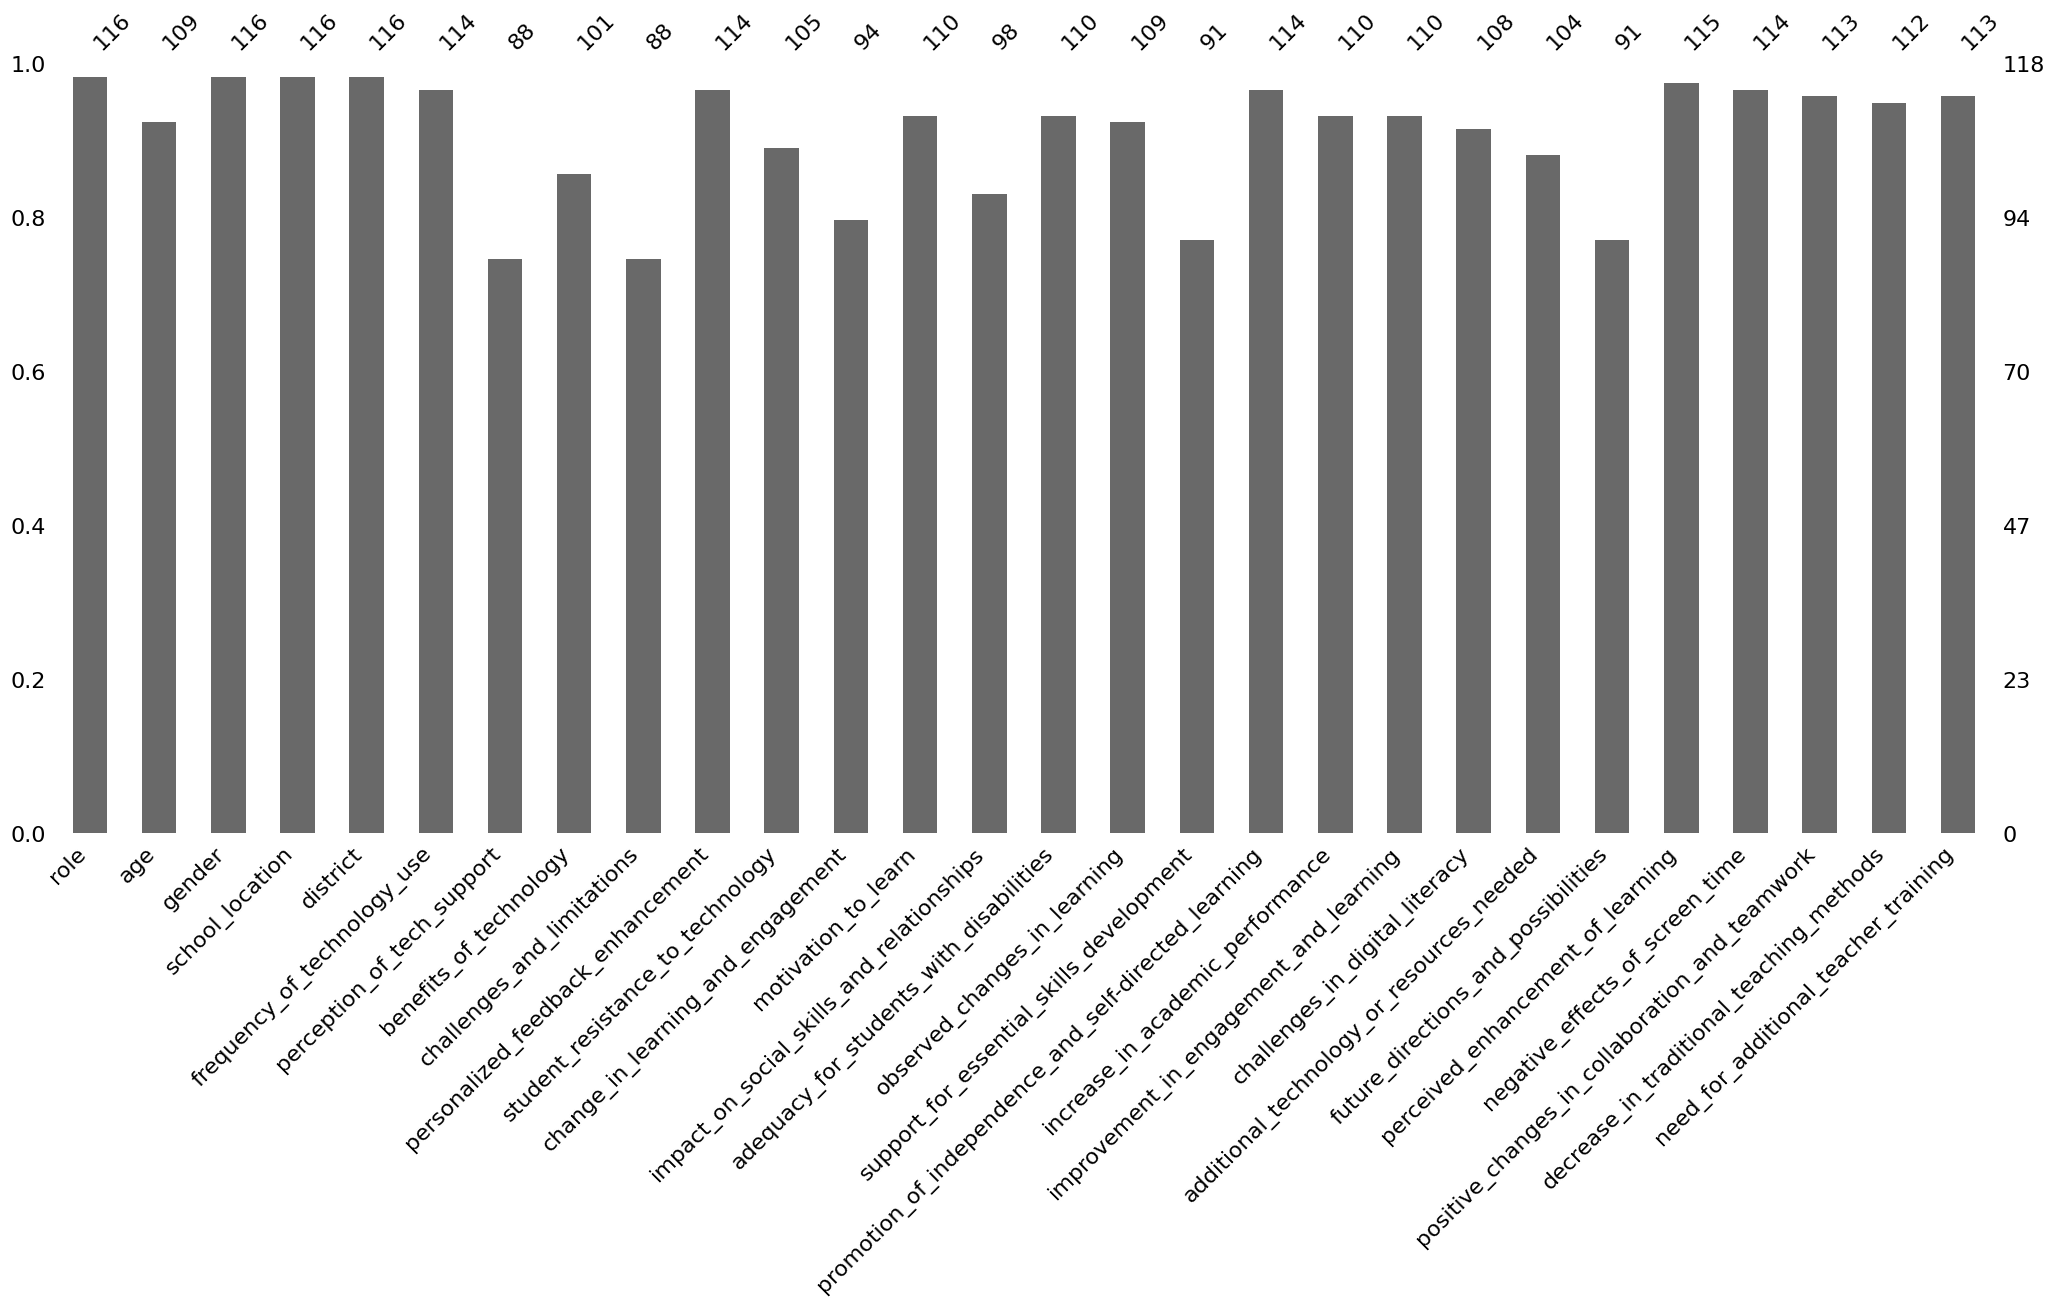

In [14]:
bar = msno.bar(df)
bar

In [13]:
df.shape

(118, 28)

In [35]:
df.columns

Index(['role', 'age', 'gender', 'school_location', 'district',
       'available_technology', 'frequency_of_technology_use',
       'perception_of_tech_support', 'benefits_of_technology',
       'challenges_and_limitations', 'personalized_feedback_enhancement',
       'student_resistance_to_technology', 'change_in_learning_and_engagement',
       'motivation_to_learn', 'impact_on_social_skills_and_relationships',
       'adequacy_for_students_with_disabilities',
       'observed_changes_in_learning',
       'support_for_essential_skills_development',
       'promotion_of_independence_and_self-directed_learning',
       'increase_in_academic_performance',
       'improvement_in_engagement_and_learning',
       'challenges_in_digital_literacy',
       'additional_technology_or_resources_needed',
       'future_directions_and_possibilities',
       'perceived_enhancement_of_learning', 'negative_effects_of_screen_time',
       'positive_changes_in_collaboration_and_teamwork',
       'decre

### Adjusting the features/columns

In [147]:
col_sentiment = ['perception_of_tech_support', 'challenges_and_limitations', 'change_in_learning_and_engagement', 
                 'impact_on_social_skills_and_relationships', 'support_for_essential_skills_development']

In [51]:
col_summary = ['perception_of_tech_support', 'benefits_of_technology', 'challenges_and_limitations',
                  'additional_technology_or_resources_needed', 'future_directions_and_possibilities']

In [52]:
col_encoding_categorical = ['role', 'gender']

In [53]:
col_encoding_label = ['personalized_feedback_enhancement', 'student_resistance_to_technology', 
                   'motivation_to_learn', 'adequacy_for_students_with_disabilities', 'observed_changes_in_learning', 
                   'promotion_of_independence_and_self_learning', 'increase_in_academic_performance', 
                   'improvement_in_engagement_and_learning', 'challenges_in_digital_literacy', 
                   'negative_effects_of_screen_time', 'positive_changes_in_collaboration_and_teamwork', 
                  'decrease_in_traditional_teaching_methods', 'need_for_additional_teacher_training']

In [54]:
col_encoding_ordinal = ['frequency_of_technology_use', 'perceived_enhancement_of_learning']

In [17]:
# 3 columns delted, 1 not considered. Remaining 24
print(df[col_encoding_label].shape[1],'\n', 
      df[col_encoding_ordinal].shape[1], '\n',
      df[col_summary].shape[1], '\n',
      df[col_sentiment].shape[1])

13 
 2 
 5 
 5


In [26]:
# # Same as col_encoding_label
# yes_no_cols_to_clean = ['personalized_feedback_enhancement', 'student_resistance_to_technology', 'motivation_to_learn', 
#                  'adequacy_for_students_with_disabilities', 'observed_changes_in_learning', 
#                  'promotion_of_independence_and_self_learning', 'increase_in_academic_performance',
#                  'improvement_in_engagement_and_learning', 'challenges_in_digital_literacy', 
#                  'negative_effects_of_screen_time', 'positive_changes_in_collaboration_and_teamwork', 
#                  'decrease_in_traditional_teaching_methods', 'need_for_additional_teacher_training']

In [27]:
# col_encoding_label == yes_no_cols_to_clean

True

In [55]:
df[col_encoding_label].shape

(118, 13)

### Cleaning the columns

In [148]:
# Set the option
pd.options.mode.copy_on_write = True

# Function to clean `col_encoding_label` columns and deal with missing values
def clean_label_encoding_columns(cols):
    # Iterate over each column in the provided list
    for col_name in cols:
        # Ensure the column is clean of NaN values
        df[col_name] = df[col_name].fillna('')

        # Convert the column to lowercase using direct column assignment
        df[col_name] = df[col_name].str.lower()

        # Replace any string containing 'yes' or 'no' with just 'Yes' or 'No'
        df[col_name] = df[col_name].apply(
            lambda x: 'Yes' if 'yes' in x else ('No' if 'no' in x else df[col_name].mode()[0].capitalize())  # x
        )

    # Return the cleaned DataFrame
    return df  # [cols]

In [149]:
# Function to clean the column 'frequency_of_technology_use' and deal with missing values
def clean_tech_use_column(df, column_name):
    # Standardize to lowercase
    df[column_name] = df[column_name].str.lower()

    # Remove leading/trailing spaces and extra spaces in between
    df[column_name] = df[column_name].str.strip().replace(r'\s+', ' ', regex=True)

    # Dictionary to map incorrect/misspelled terms to correct values
    replacements = {
        "several times a week": ["several times a week", "several time a week", "several times per week"],
        "weekly": ["weekly", "weekely", "weeky"],
        "daily": ["daily", "daly", "dailly"],
        "monthly": ["montly", "monthly"],
        "rarely": ["rarely", "rarelly"],
        "never": ["never"],
        "unknown": ["daily plus rarely", "unspecified"]  # Custom mappings for unclear terms
    }

    # Standardize entries based on the dictionary
    for correct_value, variants in replacements.items():
        for variant in variants:
            df[column_name] = df[column_name].replace(variant, correct_value)

    df[column_name] = df[column_name].fillna(df[column_name].mode()[0])

    return df

In [150]:
# Function to clean the column 'perceived_enhancement_of_learning' and deal with missing values
def clean_learning_column(df, column_name):
    # Standardize to lowercase
    df[column_name] = df[column_name].str.lower()

    # Remove leading/trailing spaces and extra spaces in between
    df[column_name] = df[column_name].str.strip().replace(r'\s+', ' ', regex=True)

    # Extract the first word using pandas string method
    df[column_name] = df[column_name].str.extract(r'(\w+)')

    # Dictionary to map incorrect/misspelled terms to correct values
    replacements = {
        "very": ["very", "4(very)", "very 4", "4"],
        "moderately": ["moderately", "3(moderately)", "moderatly", "modertely", "moderately 3", "3"],
        "extremely": ["extremely", "5(extremely)", "extremely 5", "5"],
        "slightly": ["slightly", "2(slightly)", "slightly 2", "2"],
        "not at all": ["not at all", "1(not at all)", "not", "not at all 1", "1"],
        "unknown": ["in", "learning"]
    }

    # Standardize entries based on the dictionary
    for correct_value, variants in replacements.items():
        # df[column_name] = df[column_name].replace(variants, correct_value)
        for variant in variants:
            df[column_name] = df[column_name].replace(variant, correct_value)

    df[column_name] = df[column_name].fillna(df[column_name].mode()[0])

    return df

In [151]:
# Function to clean categorical variables 'role' and 'gender' and deal with missing values
def clean_categorical_columns(df, columns):
    # Replace missing values with the mode for each column
    for col in columns:
        df[col] = df[col].fillna(df[col].mode()[0]).str.strip()  #.str.capitalize()
        df[col].replace(
            {'^f.*': 'Female',  # Matches any string starting with 'f' (e.g., female, F)
            '^m.*': 'Male'},  # Matches any string starting with 'm' (e.g., male, M)
            regex=True
        )

    return df

In [ ]:
df['perceived_enhancement_of_learning'].str.strip()[122]

In [34]:
# Check if 'very' exists in the column
if df[col_encoding_ordinal[1]].str.contains('very').any():
    print("'very' exists in the column")
else:
    print("'very' does not exist in the column")

'very' does not exist in the column


In [33]:
# Check if 'very' exactly exists in the column
if (df[col_encoding_ordinal[1]] == 'very').any():
    print("'very' exactly exists in the column")
else:
    print("'very' does not exactly exist in the column")

'very' does not exactly exist in the column


In [93]:
df[col_encoding_ordinal[1]]

0       slightly
1      extremely
2            NaN
3           very
4           very
         ...    
119         very
120     slightly
121    extremely
122         very
123     slightly
Name: perceived_enhancement_of_learning, Length: 118, dtype: object

In [26]:
re.match(r'\w+', df['perceived_enhancement_of_learning'].str.strip()[122]).group()

'Very'

In [155]:
df['gender'].isnull().sum()

0

In [153]:
# Check the updated gender column
print(df['gender'].unique())

['F' 'M' nan 'F ' 'f' 'Male ']


In [156]:
# Clean the 'role' and 'gender' columns
df = clean_categorical_columns(df, col_encoding_categorical)

# Apply the cleaning function to clean 'frequency_of_technology_use' column
df = clean_tech_use_column(df, col_encoding_ordinal[0])

# Apply the cleaning function to clean 'perceived_enhancement_of_learning' columns
df = clean_learning_column(df, col_encoding_ordinal[1])

# Call the function to clean the columns containing yes or no
df = clean_label_encoding_columns(col_encoding_label)

In [103]:
df['role'].value_counts()

role
Teacher    95
Student    15
Parent      8
Name: count, dtype: int64

In [104]:
print(df['role'].unique())

['Teacher' 'Student' 'Parent']


In [105]:
df[col_encoding_ordinal[0]].value_counts()

frequency_of_technology_use
several times a week    39
weekly                  33
daily                   19
rarely                  10
monthly                  9
never                    2
daily or weekly          1
unknown                  1
Name: count, dtype: int64

In [66]:
df[col_encoding_ordinal[1]].value_counts()

very          38
moderately    28
extremely     23
slightly      18
not at all     6
unknown        2
Name: perceived_enhancement_of_learning, dtype: int64

In [90]:
df['personalized_feedback_enhancement'].mode()[0]

'Yes'

In [157]:
features = []
dtypes = []
count = []
unique_values = []
missing_values = []
missing_values_percentage = []

# Combine the lists of column names into one
combined_columns = ['role', 'age', 'gender', 'school_location'] + col_encoding_label + col_encoding_ordinal

# Loop through the combined list of columns
for col in df[combined_columns].columns:
    features.append(col)
    dtypes.append(df[col].dtype)
    count.append(df[col].count())
    unique_values.append(df[col].nunique())
    missing_values.append(df[col].isnull().sum())
    missing_values_percentage.append(df[col].isnull().mean() * 100)

# Create a summary DataFrame (optional, for easier display)
summary_df = pd.DataFrame({
    "Feature": features,
    "Data Type": dtypes,
    "Count": count,
    "Unique Values": unique_values,
    "Missing Values": missing_values,
    "Missing Values (%)": missing_values_percentage
})

summary_df

,Feature,Data Type,Count,Unique Values,Missing Values,Missing Values (%)
0,role,object,118,4,0,0.000000
1,age,float64,109,30,9,7.627119
2,gender,object,118,4,0,0.000000
3,school_location,object,116,9,2,1.694915
4,personalized_feedback_enhancement,object,118,2,0,0.000000
5,student_resistance_to_technology,object,118,2,0,0.000000
6,motivation_to_learn,object,118,2,0,0.000000
7,adequacy_for_students_with_disabilities,object,118,2,0,0.000000
8,observed_changes_in_learning,object,118,2,0,0.000000
9,promotion_of_independence_and_self_learning,object,118,2,0,0.000000


In [102]:
# dtfr = pd.DataFrame([features, dtypes, count, unique_values, missing_values, missing_values_percentage])
# dtfr = dtfr.T
# dtfr.columns = ['features', 'dtypes', 'count', 'unique_values', 'missing_values', 'missing_values_percentage']
# dtfr

### Deal with missing values

In [158]:
# Calculate the mode for each column individually
# mode_values = df[['role', 'age', 'gender', 'school_location', 
#                   'frequency_of_technology_use', 'perceived_enhancement_of_learning']].mode().iloc[0]

# # Replace missing values in each column with the corresponding mode
# df['role'] = df['role'].replace({np.nan: mode_values['role']})
# df['age'] = df['age'].replace({np.nan: mode_values['age']})
# df['gender'] = df['gender'].replace({np.nan: mode_values['gender']})
# df['school_location'] = df['school_location'].replace({np.nan: mode_values['school_location']})
# df['frequency_of_technology_use'] = df['frequency_of_technology_use'].replace({np.nan: mode_values['frequency_of_technology_use']})
# df['perceived_enhancement_of_learning'] = df['perceived_enhancement_of_learning'].replace(
#     {np.nan: mode_values['perceived_enhancement_of_learning']}
#     )

mode_values = df[['age', 'school_location']].mode().iloc[0]

df['age'] = df['age'].replace({np.nan: mode_values['age']})
df['school_location'] = df['school_location'].replace({np.nan: mode_values['school_location']})

In [94]:
# df['role'].fillna(df['role'].mode()[0], inplace=True)

In [159]:
print(df['school_location'].unique())

['Aliabad' 'Karimabad' 'Nagar Khas' 'Nilt nagar' 'Ghulmet nagar'
 'Jafarabad' 'Near Nagar chowk' 'Rural' 'Rural ']


### Label encoding

In [ ]:
# from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding categorical variables
# for col in col_encoding_label:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     col_encoding_label[col] = le

# Step 3: Analysis

## Function to draw plot of categorical variables

In [160]:
# Function to draw plot of categorical variables
def plot_categorical_variables(df, columns, figsize=(12, 8), ylabel=None, save_path=None):
    
    # Create the plot
    plt.figure(figsize=figsize)

    # Iterate through each column and plot on a separate subplot
    for i, col in enumerate(columns):  # Use 'col' instead of 'column' for clarity
        # Count the occurrences of each category
        value_counts = df[col].value_counts()
        percent_value_counts = df[col].value_counts(normalize=True) * 100
        
        # Create subplots for each categorical variable
        plt.subplot(len(columns), 2, i+1)  # Adjust to use len(columns)
        
        # Plot on respective subplot
        sns.barplot(x=percent_value_counts.index, y=percent_value_counts.values, hue=percent_value_counts.index, palette='viridis') 
           
        # plt.title(f'{title} of {col.replace("_", " ").capitalize()}')  # Corrected f-string
        plt.xlabel(f'{col.replace("_", " ").capitalize()}')
        plt.ylabel(ylabel)

        # Rotate x-axis labels if there are more than 3 categories
        if len(value_counts) > 3:
            plt.xticks(rotation=45)
        
    # Adjust layout and show the plot
    plt.tight_layout()

    # Save the plot if a save path is provided
    if save_path:
        plt.savefig(save_path, format='png', dpi=300)  # Save the plot with high resolution (300 DPI)

    plt.show()

## Analysis of open-ended variables/features

### Sentiment analysis of open-ended variable/features

In [122]:
# from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

e:\Post PhD Research\Supervision\BS\BEd-group\Analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Binary-class sentiment analysis

In [123]:
# Load a pre-trained BERT model fine-tuned for sentiment analysis

# Here we're using 'distilbert-base-uncased-finetuned-sst-2-english', which is fine-tuned for sentiment analysis
classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

e:\Post PhD Research\Supervision\BS\BEd-group\Analysis\.venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [34]:
# # Applying sentiment analysis to each response
# df['learning_and_engagement'] = df['change_in_learning_and_engagement'].dropna().apply(lambda x: classifier(x)[0]['label'].capitalize())
# df['social_skills_and_relationships'] = df['impact_on_social_skills_and_relationships'].dropna().apply(lambda x: classifier(x)[0]['label'].capitalize())
# df['essential_skills_development'] = df['support_for_essential_skills_development'].dropna().apply(lambda x: classifier(x)[0]['label'].capitalize())

e:\Post PhD Research\Supervision\BS\BEd-group\Analysis\.venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


### Fine-tuning the above to get multi-class sentiment analysis

In [126]:
col_sentiment

['perception_of_tech_support',
 'challenges_and_limitations',
 'change_in_learning_and_engagement',
 'impact_on_social_skills_and_relationships',
 'support_for_essential_skills_development']

In [124]:
# Function to classify sentiment with a neutral case
def classify_sentiment(text, neutral_threshold=0.6):
    result = classifier(text)[0]
    label = result['label'].capitalize()
    score = result['score']
    
    # Consider sentiment as 'Neutral' if the score is below the neutral_threshold
    if score < neutral_threshold:
        return 'Neutral'
    return label

In [127]:
# Applying sentiment analysis to each column in 'col_sentiment'
for col in col_sentiment:
    df[col] = df[col].dropna().apply(lambda x: classify_sentiment(x))

In [125]:
# # Applying sentiment analysis to each response with the neutral case
# df['learning_and_engagement_sentiment'] = df['change_in_learning_and_engagement'].dropna().apply(
#     lambda x: classify_sentiment(x))
# df['social_skills_and_relationships_sentiment'] = df['impact_on_social_skills_and_relationships'].dropna().apply(
#     lambda x: classify_sentiment(x))
# df['essential_skills_development_sentiment'] = df['support_for_essential_skills_development'].dropna().apply(
#     lambda x: classify_sentiment(x))

In [133]:
df['essential_skills_development_sentiment'].dropna()

1      Positive
2      Negative
3      Negative
4      Positive
5      Negative
7      Positive
9      Positive
16     Positive
17     Positive
19     Positive
20     Negative
21     Positive
22     Positive
23     Positive
24     Positive
26     Positive
27     Positive
29     Positive
30     Positive
31     Negative
32     Negative
33     Positive
34     Positive
35     Negative
36     Negative
44     Positive
45     Positive
46     Positive
47     Positive
48     Positive
49     Negative
50     Positive
51     Positive
52     Positive
53     Negative
54     Positive
55     Positive
59     Positive
60     Positive
61     Positive
62     Positive
63     Positive
64     Positive
65     Positive
66     Positive
67     Positive
68     Negative
69     Positive
71     Positive
72     Positive
73     Positive
74     Positive
76     Negative
77     Negative
78     Positive
79     Positive
83     Positive
84     Positive
85     Positive
86     Positive
87     Negative
88     Positive
89     P

In [136]:
# Assuming 'classifier' returns a list with a dictionary containing both 'label' and 'score'
indices_scores = df['essential_skills_development_sentiment'].dropna().apply(lambda x: classifier(x)[0])

# Create a DataFrame to store the classification results
classification_results = pd.DataFrame(indices_scores.tolist())

# Filter the DataFrame where the sentiment is 'NEGATIVE'
negative_results = classification_results[classification_results['label'] == 'NEGATIVE']

# Get the indices of 'NEGATIVE' sentiments in the original DataFrame
negative_indices = negative_results.index.tolist()

# Get the scores of 'NEGATIVE' sentiments
negative_scores = negative_results['score'].tolist()

In [137]:
# Output the indices and corresponding scores
print(f"Negative indices: {negative_indices}")
print(f"Negative scores: {negative_scores}")

Negative indices: [1, 2, 4, 10, 19, 20, 23, 24, 30, 34, 46, 52, 53, 60, 67, 76, 87]
Negative scores: [0.9997726082801819, 0.9997726082801819, 0.9997726082801819, 0.9997726082801819, 0.9997726082801819, 0.9997726082801819, 0.9997726082801819, 0.9997726082801819, 0.9997726082801819, 0.9997726082801819, 0.9997726082801819, 0.9997726082801819, 0.9997726082801819, 0.9997726082801819, 0.9997726082801819, 0.9997726082801819, 0.9997726082801819]


### Multi-class sentiment analysis

In [72]:
# # Run time is large
# # Load a multi-class sentiment analysis model
# classifier = pipeline('sentiment-analysis', model='cardiffnlp/twitter-roberta-base-sentiment-latest')

# # Sample data (replace with your dataframe columns)
# texts_tech_multi = df['frequency_of_technology_use']

# # Apply sentiment analysis to each text response
# df['sentiment_tech_multi'] = texts_tech_multi.apply(lambda x: classifier(x)[0]['label'])
# df['confidence_tech_multi'] = texts_tech_multi.apply(lambda x: classifier(x)[0]['score'])

e:\Post PhD Research\Supervision\BS\BEd-group\Analysis\.venv\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\math_\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment-latest. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


KeyboardInterrupt: 

In [128]:
df.shape

(118, 31)

In [52]:
df.head()

,role,age,gender,school_location,district,frequency_of_technology_use,perception_of_tech_support,benefits_of_technology,challenges_and_limitations,personalized_feedback_enhancement,student_resistance_to_technology,change_in_learning_and_engagement,motivation_to_learn,impact_on_social_skills_and_relationships,adequacy_for_students_with_disabilities,observed_changes_in_learning,support_for_essential_skills_development,promotion_of_independence_and_self-directed_learning,increase_in_academic_performance,improvement_in_engagement_and_learning,challenges_in_digital_literacy,additional_technology_or_resources_needed,future_directions_and_possibilities,perceived_enhancement_of_learning,negative_effects_of_screen_time,positive_changes_in_collaboration_and_teamwork,decrease_in_traditional_teaching_methods,need_for_additional_teacher_training,sentiment_tech,sentiment_learning
0,teacher,31.0,F,Aliabad,Hunza,several times a week,NaN,NaN,NaN,Yes,No,NaN,Yes,NaN,No,Yes,NaN,Yes,Yes,Yes,Yes,NaN,NaN,slightly,Yes,No,No,Yes,Positive,Positive
1,teacher,28.0,F,Aliabad,Hunza,monthly,Technology can help teachers and students in e...,"Increase motivation, access to vast learning m...",Lack of teachnological literacy can cause bigg...,Yes,Yes,Technonlogy has drastically changed the proces...,Yes,Teacher role has become more modified in the d...,Yes,Yes,Various learning wibsites onlines quizes can h...,Yes,Yes,Yes,Yes,"Digiltal boards,LMS and IT labs with modern ga...",More tarning and digital literacy courses.,extremely,Yes,Yes,Yes,Yes,Positive,Positive
2,teacher,30.0,F,Aliabad,Hunza,several times a week,The use of technology during whole class inter...,Students develop crucial skills such as digita...,Technology in education can reduce face to fac...,Yes,No,Student can collabrate on group project using ...,Yes,The technology impact on our social skill its ...,Yes,Yes,"To improve your crtical thiking, you need to b...",Yes,Yes,Yes,No,Prepare student for the future we connect with...,Student can practice desnging prolem solving.,very,Yes,Yes,No,Yes,Positive,Positive
3,teacher,35.0,F,Aliabad,Hunza,several times a week,It captures the intrest of students which resu...,"It enhances listing, reading, writing and spea...","Interaption of internet, irrelevant data for y...",Yes,No,Technology change the way we learn about thing...,Yes,The technology impact is very easy to work qui...,Yes,No,As primary studets are not much eligible to ta...,No,Yes,Yes,No,"Chrom books, referance books.","AI, tablets and chrom book .",very,Yes,Yes,Yes,Yes,Positive,Positive
4,teacher,33.0,F,Aliabad,Hunza,weekly,Technology hepls kids better by giving them fu...,The most improtant benefits of using technolog...,using too much technology can distract kids no...,Yes,No,While using technolgy it helps enchance their ...,No,Too much tech can make us less caring and unde...,Yes,Yes,Technology can helps kids think creativly by u...,Yes,No,Yes,No,Interactive whiteboard and eductional apps can...,In the future technology will continue to inno...,very,No,No,No,Yes,Positive,Positive


In [81]:
df[['frequency_of_technology_use', 'sentiment_tech']].value_counts()

frequency_of_technology_use  sentiment_tech
several times a week         Positive          43
weekly                       Positive          33
daily                        Positive          19
rarely                       Positive          10
monthly                      Positive           9
never                        Negative           2
daily or weekly              Positive           1
unknown                      Negative           1
Name: count, dtype: int64

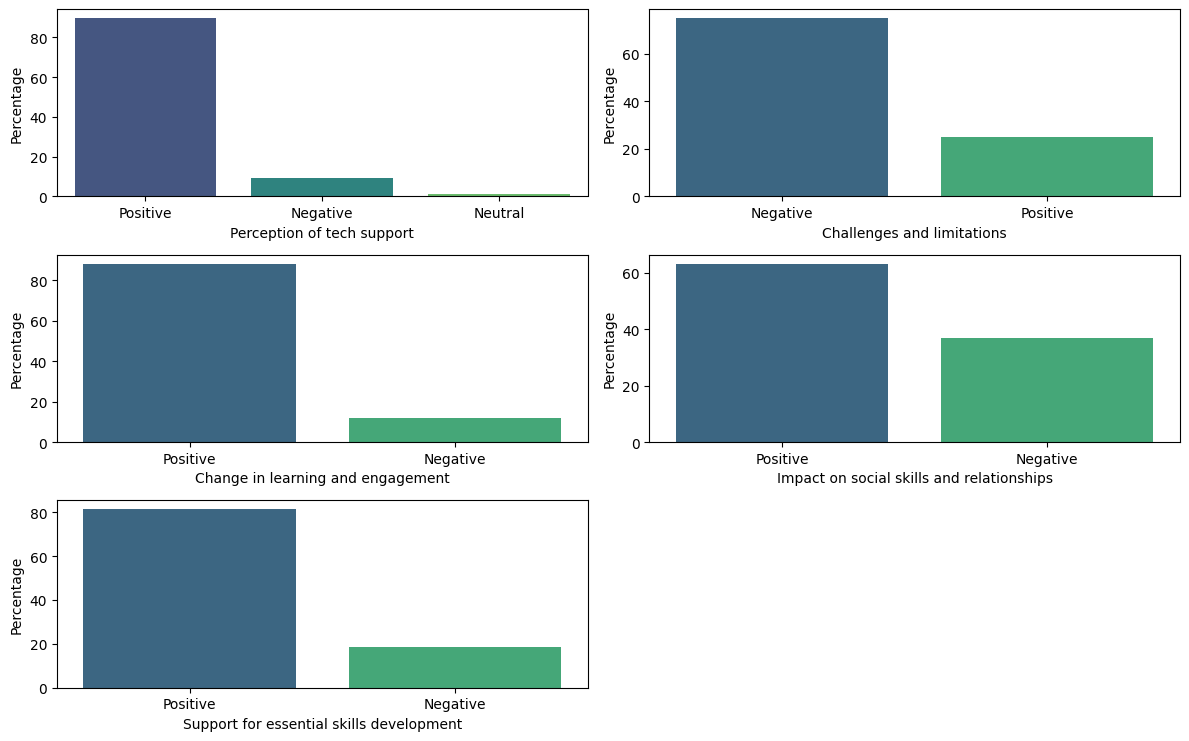

In [130]:
plot_categorical_variables(df, col_sentiment, (12, 12), 
                              ylabel="Percentage", save_path="sentiment_distribution_plot.png")

### Summary of open-ended variables/features

In [161]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [162]:
# Load the Hugging Face summarization pipeline
summarizer = pipeline("summarization", model="Falconsai/text_summarization")

# Function to summarize long text by splitting it into smaller chunks with overlap
def summarize_responses(text_series, max_length=15, min_length=10, chunk_size=500, overlap_size=100):
    combined_text = " ".join(text_series.dropna().tolist())  # Combine all text
    
    # Use RecursiveCharacterTextSplitter to split the text into chunks with overlap
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=overlap_size)
    text_chunks = text_splitter.split_text(combined_text)
    
    # Summarize each chunk
    summaries = [summarizer(chunk, max_length=max_length, min_length=min_length, do_sample=False)[0]['summary_text'] for chunk in text_chunks]
    
    # Combine all summaries into one final summary
    final_summary = " ".join(summaries)
    
    return final_summary

#-----------------------------------------------------------------
# # Function to summarize long text by splitting it into smaller chunks with overlap
# def summarize_responses(text_series, max_length=120, min_length=20, chunk_size=500, overlap_size=100):
#     combined_text = " ".join(text_series.dropna().tolist())  # Combine all text
    
#     # Split the text into chunks with overlap
#     text_chunks = [combined_text[i:i+chunk_size] for i in range(0, len(combined_text), chunk_size - overlap_size)]
    
#     # Summarize each chunk
#     summaries = [summarizer(chunk, max_length=max_length, min_length=min_length, do_sample=False)[0]['summary_text'] for chunk in text_chunks]
    
#     # Combine all summaries into one final summary
#     final_summary = " ".join(summaries)
    
#     return final_summary

In [106]:
# # Prepare the combined text as a document for splitting
# combined_text_exp = " ".join(df['perception_of_tech_support'].dropna().tolist())

# # Create an instance of RecursiveCharacterTextSplitter with desired chunk size and overlap
# text_splitter = RecursiveCharacterTextSplitter(chunk_size=1500, chunk_overlap=250)

# # Split the combined text into chunks with overlap
# # The input needs to be a list of documents, so we wrap the string in a list
# text_chunks = text_splitter.split_text(combined_text_exp)

Technology can help teachers and students in effective learning taking help while using teachnolgy in classroom can incerase the motivation and interest toward learning . The use of technology during whole class interaction can foster. Students can use spelling phonetic and reading skill. It captures the intrest of students which results in effective learning. Technology hepls kids better by giving them fun and interactive tools that match what they are studying in school. Educational technology is the need of time to make teaching learning process effectively. With the help of technology,learners can access a wealth of information and resources related to demond such as,new vedioes and interactive tools. Students take more interest in learning when we use technology.  NA Primary students takes interest interactive learning  activity so it can be best support for a teacher to make encourge learning environment. Picture is more effective as camper to words. Technology can best support t

In [107]:
# # text_chunks
# # Function to print chunks and token counts
# for chunk in text_chunks:
#     # Count the number of tokens (splitting by whitespace)
#     token_count = len(chunk.split())
    
#     # Print the chunk and token count
#     print(chunk)
#     print(f"Token count: {token_count}")
#     print('*' * 50)

Technology can help teachers and students in effective learning taking help while using teachnolgy in classroom can incerase the motivation and interest toward learning . The use of technology during whole class interaction can foster. Students can use spelling phonetic and reading skill. It captures the intrest of students which results in effective learning. Technology hepls kids better by giving them fun and interactive tools that match what they are studying in school. Educational technology is the need of time to make teaching learning process effectively. With the help of technology,learners can access a wealth of information and resources related to demond such as,new vedioes and interactive tools. Students take more interest in learning when we use technology.  NA Primary students takes interest interactive learning  activity so it can be best support for a teacher to make encourge learning environment. Picture is more effective as camper to words. Technology can best support t

In [93]:
# combined_text_exp

'Technology can help teachers and students in effective learning taking help while using teachnolgy in classroom can incerase the motivation and interest toward learning . The use of technology during whole class interaction can foster. Students can use spelling phonetic and reading skill. It captures the intrest of students which results in effective learning. Technology hepls kids better by giving them fun and interactive tools that match what they are studying in school. Educational technology is the need of time to make teaching learning process effectively. With the help of technology,learners can access a wealth of information and resources related to demond such as,new vedioes and interactive tools. Students take more interest in learning when we use technology.  NA Primary students takes interest interactive learning  activity so it can be best support for a teacher to make encourge learning environment. Picture is more effective as camper to words. Technology can best support 

In [111]:
# # Sample dataframe with open-ended text
# text_data = df['perception_of_tech_support'] 

# # Get summary of open-ended responses
# summary = summarize_responses(text_data)

# # Print the summary
# print("Summary of the open-ended responses:\n", summary)

Summary of the open-ended responses:
 Technology can help teachers and students in effective learning taking help while using teachnolgy in classroom can ince educational technology is the need of time to make teaching learning process effective . With the help of technology,learner Priovide learning objective easily and know the exact level primary classes . It is best tro access to online educational Technology can suppport in learning objectives of primary studennts in many aspects like audios, visual Technology can best support the learning objective of primary students in this era of modern technology . without technology studen of student are attract technology provide online learning plateform yes student learn more things than without tschnology technology allows to technology can greatly support the learning objectives of primary school in various ways . provide attrctive and deep knowledge use the techonology equipments in primary level, some time to improve the education tec

### Summarize each column in `col_summary`

In [163]:
# Summarize each column
summary_dict = {}
for col in col_summary:
    summary_dict[col] = summarize_responses(df[col])
    # print(f"Summary of {col}:\n", summary_dict[col])
    # print("-" * 50)

In [87]:
# Print the summaries for each column
for col, summary in summary_dict.items():
    print(f"Summary of {col}:\n{summary}\n")

Summary of perception_of_tech_support:
Technology can help teachers and students in effective learning taking help while using teach educational technology is the need of time to make teaching process effective . Priovide learning objective easily and know the exact level primary classes Technology can suppport in learning objectives of primary studenn Technology can best support the learning objective of primary students in this era of student are attract technology provide online learning plateform yes student learn more technology can greatly support the learning objectives of primary school in various ways  use the techonology equipments in primary level, some time to it boosts up learning skills of syudent it technology helps students and give new ideas about learning personalized learning, adaptive software technology is best source of students work technology helps students and give new ideas and engaging learning experience student can use interactive games to reinforce reading

In [165]:
# Optionally: Store the summaries in a new dataframe
summaries_df = pd.DataFrame.from_dict(summary_dict, orient='index', columns=['Summary'])

In [166]:
# Set the option to display full text in cells
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
summaries_df

,Summary
perception_of_tech_support,"Technology can help teachers and students in effective learning taking help while using teach educational technology is the need of time to make teaching process effective . Priovide learning objective easily and know the exact level primary classes Technology can suppport in learning objectives of primary studenn Technology can best support the learning objective of primary students in this era of student are attract technology provide online learning plateform yes student learn more technology can greatly support the learning objectives of primary school in various ways use the techonology equipments in primary level, some time to it boosts up learning skills of syudent it technology helps students and give new ideas about learning personalized learning, adaptive software technology is best source of students work technology helps students and give new ideas and engaging learning experience student can use interactive games to reinforce reading skills technology of students can easily solve their problem and understand easily with the help of Learning objectives achieved by technological usage Helps students in improvement of skills Technology Yes technology should be used in primary section it motivates children We get Technology helps in personalized learning experience It helps educators to improve their teaching methods Students learn better Technology can be used to build fundamental skills to prepare them"
benefits_of_technology,"Increase motivation, access to vast learning materials, easy to learn and teach Quick information exchange,developing basic skills encouraging love for learning . Student learn easily while using technology. Time utilization, better understanding and comp can learn easily and they can cope easily with daily life situation . Technology is very benifical in pirmary education because Technology is very benefishery for pirmary bea way of learning Tying improve, listening issues and they build speaking power Graphic learning students become aware of technology at early stage in primary education adaptive learning platform can lessons to the individuals need and peace of students it current era which help to get attention of studets from vedios it enhance memorization technology helps can increase student interest and participation easy to learning enhanced engagement, experience and new knowledge and creativity easy to learn easy and fast learning usings books providing suitable feedback Better improvement in students learning Self sufficient Motivation for learning Technology Incorporate different learning styles Skill development and awareness of technology Technology facilitate Technology helps in hard work easier to do Prepare students for future ."
challenges_and_limitations,"Lack of teachnological literacy can cause bigger challenges for teacher . Mostly light create challenge for using technology . Shortage of elect Mostly light create challenge for using technology . Shortage of elect power short fall,lack of internet facility and low percentage of budget Excessuve screen time can negatively impact physical and mental health to weak signls we rae facing challenges. I Excessive use of technology may lead far from activities lack of from activities miss use of technology is one of main challeng resources managing computer in classroom with the help of technology we can enhance the software glitches, connectivity problem cyberbullying and online safety concerns High usage of technology, addiction and medical issues Electricity and internet issues Internet access Reduced social interaction and internet access Socialization is disturbed Electric"
additional_technology_or_resources_needed,"Smart board, multimedia,chrom books and LCDs can en Smart board Laptop,tablets and TVs Time management research development Field studies, trips toward nature and low cost matarial should be Laptop and LCD LEDs in every class with internet AV Aids Mutimedia and screen system

In [73]:
pd.reset_option('display.max_colwidth')

In [121]:
print(summaries_df.to_string())

In [ ]:
# from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

e:\Post PhD Research\Supervision\BS\BEd-group\Analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Sentiment analysis of open-ended variables/features

In [ ]:
# from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

### Binary-class sentiment analysis

In [167]:
# Load a pre-trained BERT model fine-tuned for sentiment analysis

# Here we're using 'distilbert-base-uncased-finetuned-sst-2-english', which is fine-tuned for sentiment analysis
classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

e:\Post PhD Research\Supervision\BS\BEd-group\Analysis\.venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# # Applying sentiment analysis to each response
# df['learning_and_engagement'] = df['change_in_learning_and_engagement'].dropna().apply(lambda x: classifier(x)[0]['label'].capitalize())
# df['social_skills_and_relationships'] = df['impact_on_social_skills_and_relationships'].dropna().apply(lambda x: classifier(x)[0]['label'].capitalize())
# df['essential_skills_development'] = df['support_for_essential_skills_development'].dropna().apply(lambda x: classifier(x)[0]['label'].capitalize())

e:\Post PhD Research\Supervision\BS\BEd-group\Analysis\.venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


### Fine-tuning the above to get multi-class sentiment analysis

In [168]:
# Function to classify sentiment with a neutral case
def classify_sentiment(text, neutral_threshold=0.6):
    result = classifier(text)[0]
    label = result['label'].capitalize()
    score = result['score']
    
    # Consider sentiment as 'Neutral' if the score is below the neutral_threshold
    if score < neutral_threshold:
        return 'Neutral'
    return label

In [169]:
# Applying sentiment analysis to each column in 'col_sentiment'
for col in col_sentiment:
    df[col] = df[col].dropna().apply(lambda x: classify_sentiment(x))

In [170]:
# # Run time is large
# # Load a multi-class sentiment analysis model
# classifier = pipeline('sentiment-analysis', model='cardiffnlp/twitter-roberta-base-sentiment-latest')

# # Sample data (replace with your dataframe columns)
# texts_tech_multi = df['frequency_of_technology_use']

# # Apply sentiment analysis to each text response
# df['sentiment_tech_multi'] = texts_tech_multi.apply(lambda x: classifier(x)[0]['label'])
# df['confidence_tech_multi'] = texts_tech_multi.apply(lambda x: classifier(x)[0]['score'])

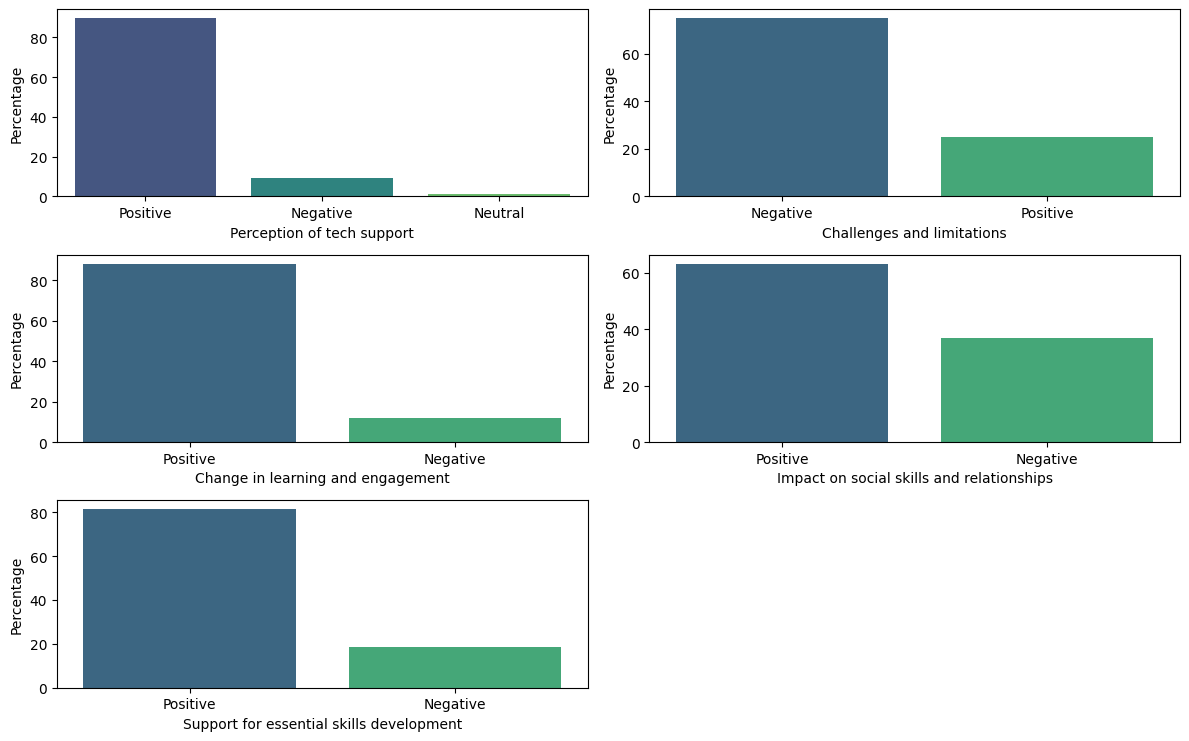

In [171]:
plot_categorical_variables(df, col_sentiment, (12, 12), 
                              ylabel="Percentage", save_path="sentiment_distribution_plot.png")

## Analysis of closed-ended variables/features

In [122]:
df.describe(include=['object'])

,role,gender,school_location,district,frequency_of_technology_use,perception_of_tech_support,benefits_of_technology,challenges_and_limitations,personalized_feedback_enhancement,student_resistance_to_technology,change_in_learning_and_engagement,motivation_to_learn,impact_on_social_skills_and_relationships,adequacy_for_students_with_disabilities,observed_changes_in_learning,support_for_essential_skills_development,promotion_of_independence_and_self-directed_learning,increase_in_academic_performance,improvement_in_engagement_and_learning,challenges_in_digital_literacy,additional_technology_or_resources_needed,future_directions_and_possibilities,perceived_enhancement_of_learning,negative_effects_of_screen_time,positive_changes_in_collaboration_and_teamwork,decrease_in_traditional_teaching_methods,need_for_additional_teacher_training,sentiment_tech,sentiment_learning
count,118,118,118,116,118,88,101,88,118,118,94,118,98,118,118,91,118,118,118,118,104,91,118,118,118,118,118,118,118
unique,3,5,9,3,8,80,89,83,2,2,89,2,92,2,2,84,2,2,2,2,94,80,6,2,2,2,2,2,2
top,teacher,F,Nagar Khas,Nagar,several times a week,technology helps students and and give new ideas about learning,easy to learn,"light issues, and internet",Yes,No,because of different and easy path,Yes,technology change learning skill as well,Yes,Yes,technology needs us to develop critical thinking,Yes,Yes,Yes,Yes,"projector, excel,are used",technology should used in primary education,very,Yes,Yes,Yes,Yes,Positive,Positive
freq,95,82,42,70,43,4,4,2,97,71,3,102,4,81,105,3,93,92,104,66,4,4,41,106,88,76,105,115,110


In [129]:
df[col_encoding_label].describe(include=['object'])

,role,personalized_feedback_enhancement,student_resistance_to_technology,motivation_to_learn,adequacy_for_students_with_disabilities,observed_changes_in_learning,promotion_of_independence_and_self-directed_learning,increase_in_academic_performance,improvement_in_engagement_and_learning,challenges_in_digital_literacy,negative_effects_of_screen_time,positive_changes_in_collaboration_and_teamwork,decrease_in_traditional_teaching_methods,need_for_additional_teacher_training
count,118,118,118,118,118,118,118,118,118,118,118,118,118,118
unique,3,2,2,2,2,2,2,2,2,2,2,2,2,2
top,teacher,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
freq,95,97,71,102,81,105,93,92,104,66,106,88,76,105


In [127]:
df['sentiment_tech'].describe()

count          118
unique           2
top       Positive
freq           115
Name: sentiment_tech, dtype: object

In [97]:
# Calculate the percentage value counts
percent_value_counts = df['frequency_of_technology_use'].value_counts(normalize=True) * 100
percent_value_counts

frequency_of_technology_use
several times a week    36.440678
weekly                  27.966102
daily                   16.101695
rarely                   8.474576
monthly                  7.627119
never                    1.694915
daily or weekly          0.847458
unknown                  0.847458
Name: proportion, dtype: float64

In [165]:
col_encoding_ordinal

['frequency_of_technology_use', 'perceived_enhancement_of_learning']

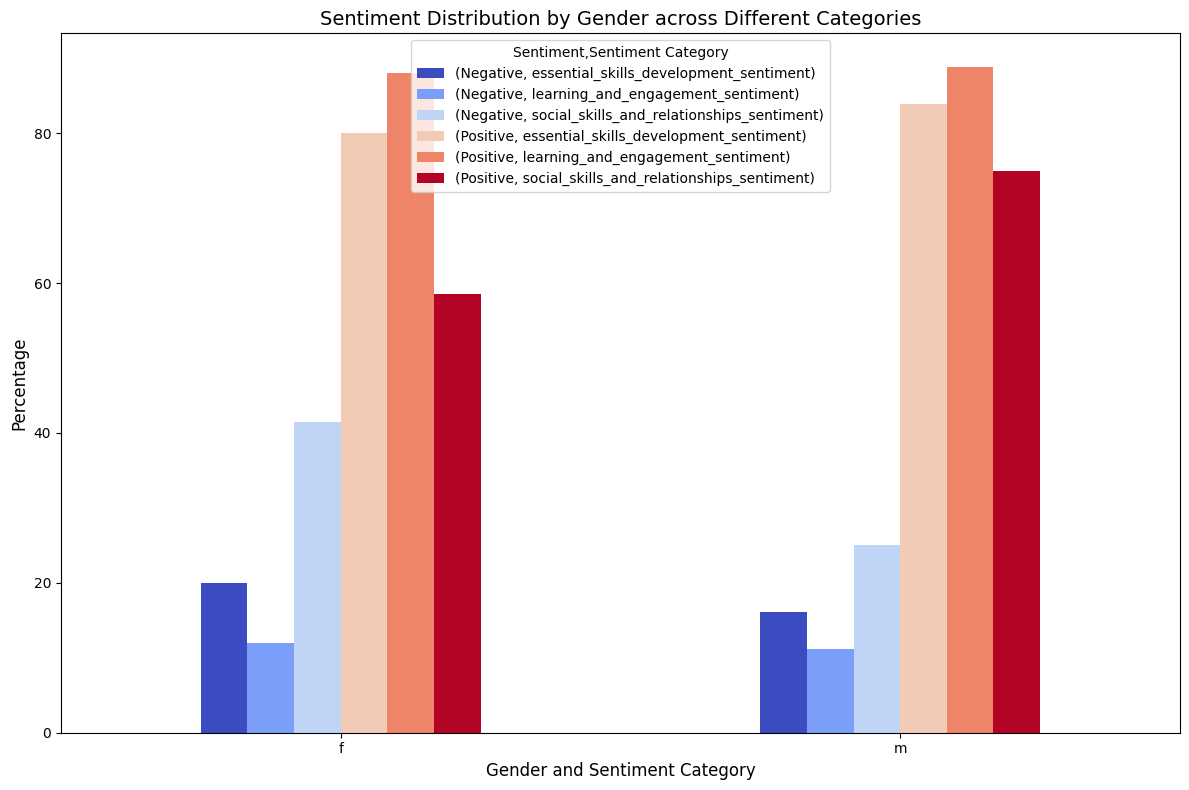

In [199]:
# Reshape the data for plotting
melted_df = df.melt(id_vars=['gender'], value_vars=col_sentiment, 
                    var_name='Sentiment Category', value_name='Sentiment')

# Create a crosstab (normalized to get percentages) between Gender and Sentiment
cross_tab = pd.crosstab([melted_df['gender'], melted_df['Sentiment Category']], 
                        melted_df['Sentiment'], normalize='index') * 100

# Unstack the table for plotting
cross_tab = cross_tab.unstack(level=1)

# Plot the stacked bar chart
cross_tab.plot(kind='bar', stacked=False, figsize=(12, 8), colormap='coolwarm')

# Add title and labels
plt.title('Sentiment Distribution by Gender across Different Categories', fontsize=14)
plt.xlabel('Gender and Sentiment Category', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

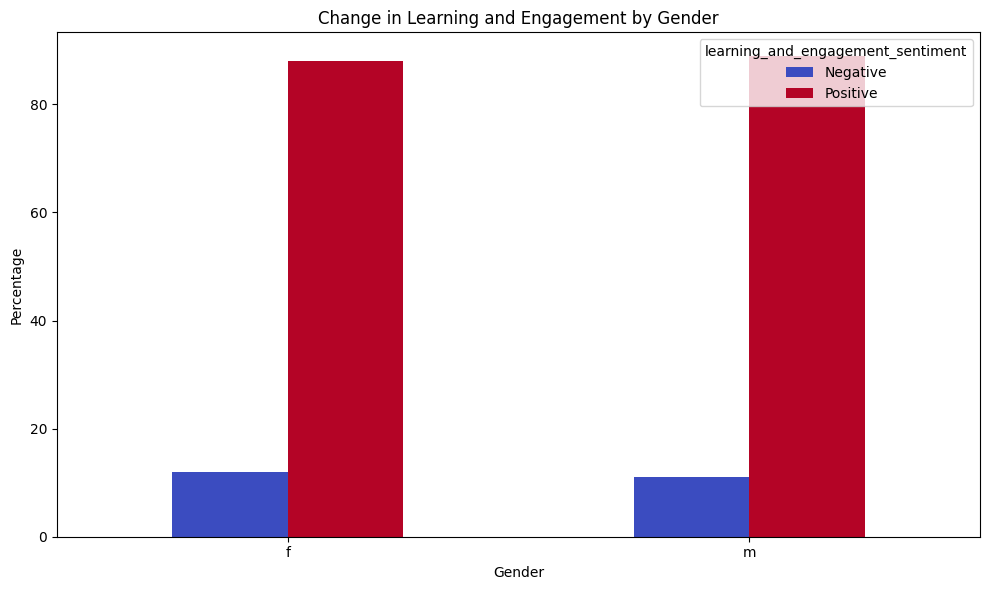

In [193]:
# Count the occurrences of each category
cross_tab = pd.crosstab(df['gender'], df['learning_and_engagement_sentiment'], normalize='index') * 100

# Plot the stacked bar chart
cross_tab.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='coolwarm')

# Add title and labels
plt.title('Change in Learning and Engagement by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


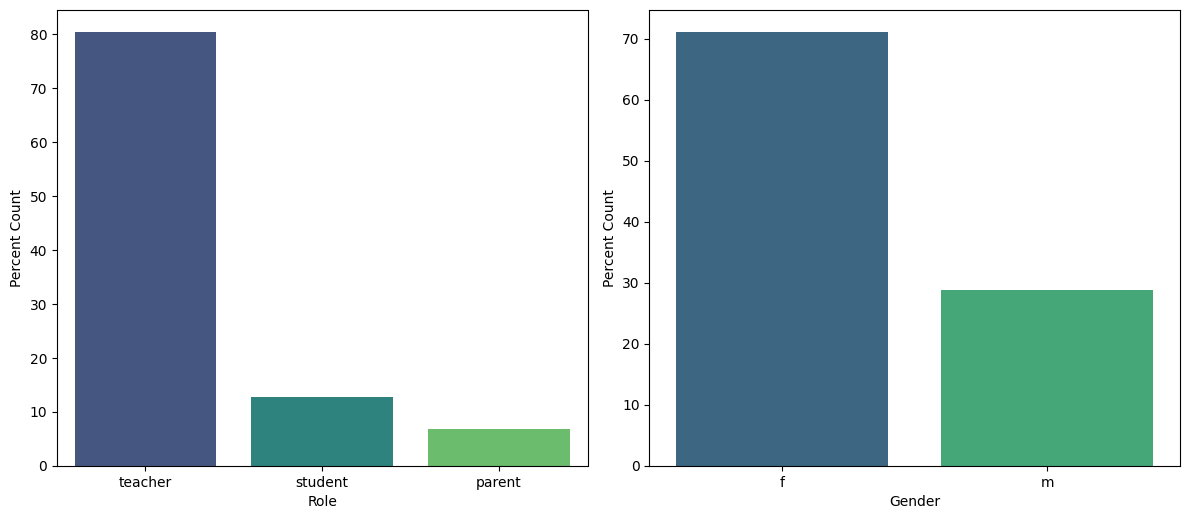

In [183]:
# Draw 'col_encoding_categorical'
plot_categorical_variables(df, col_encoding_categorical, (12, 10), ylabel="Percent Count")

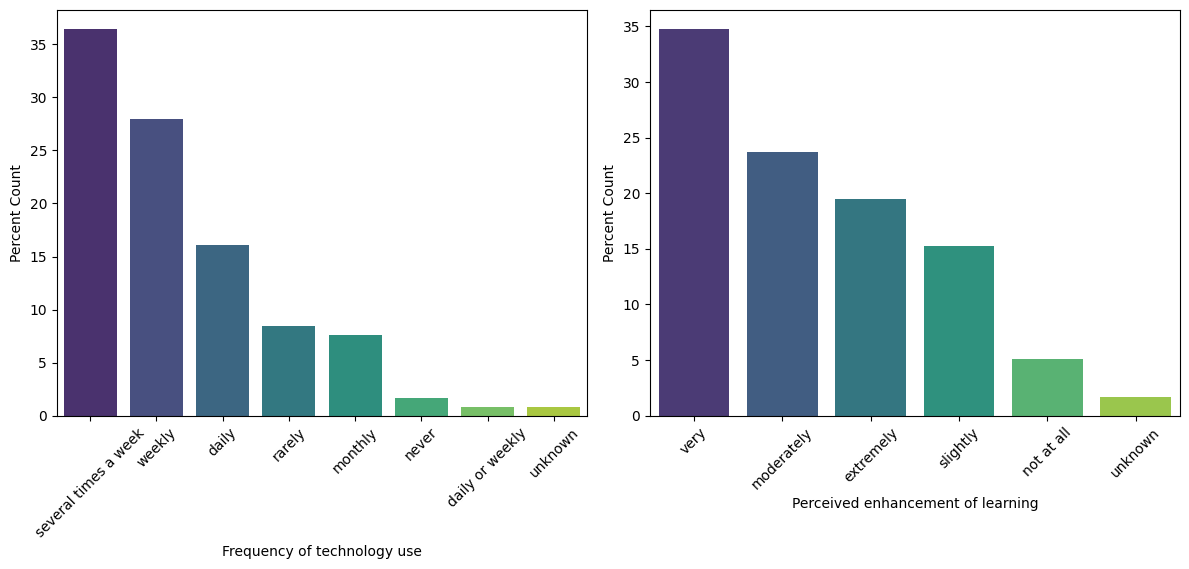

In [166]:
# Draw 'col_encoding_ordinal'
plot_categorical_variables(df, col_encoding_ordinal, (12, 10), ylabel="Percent Count")

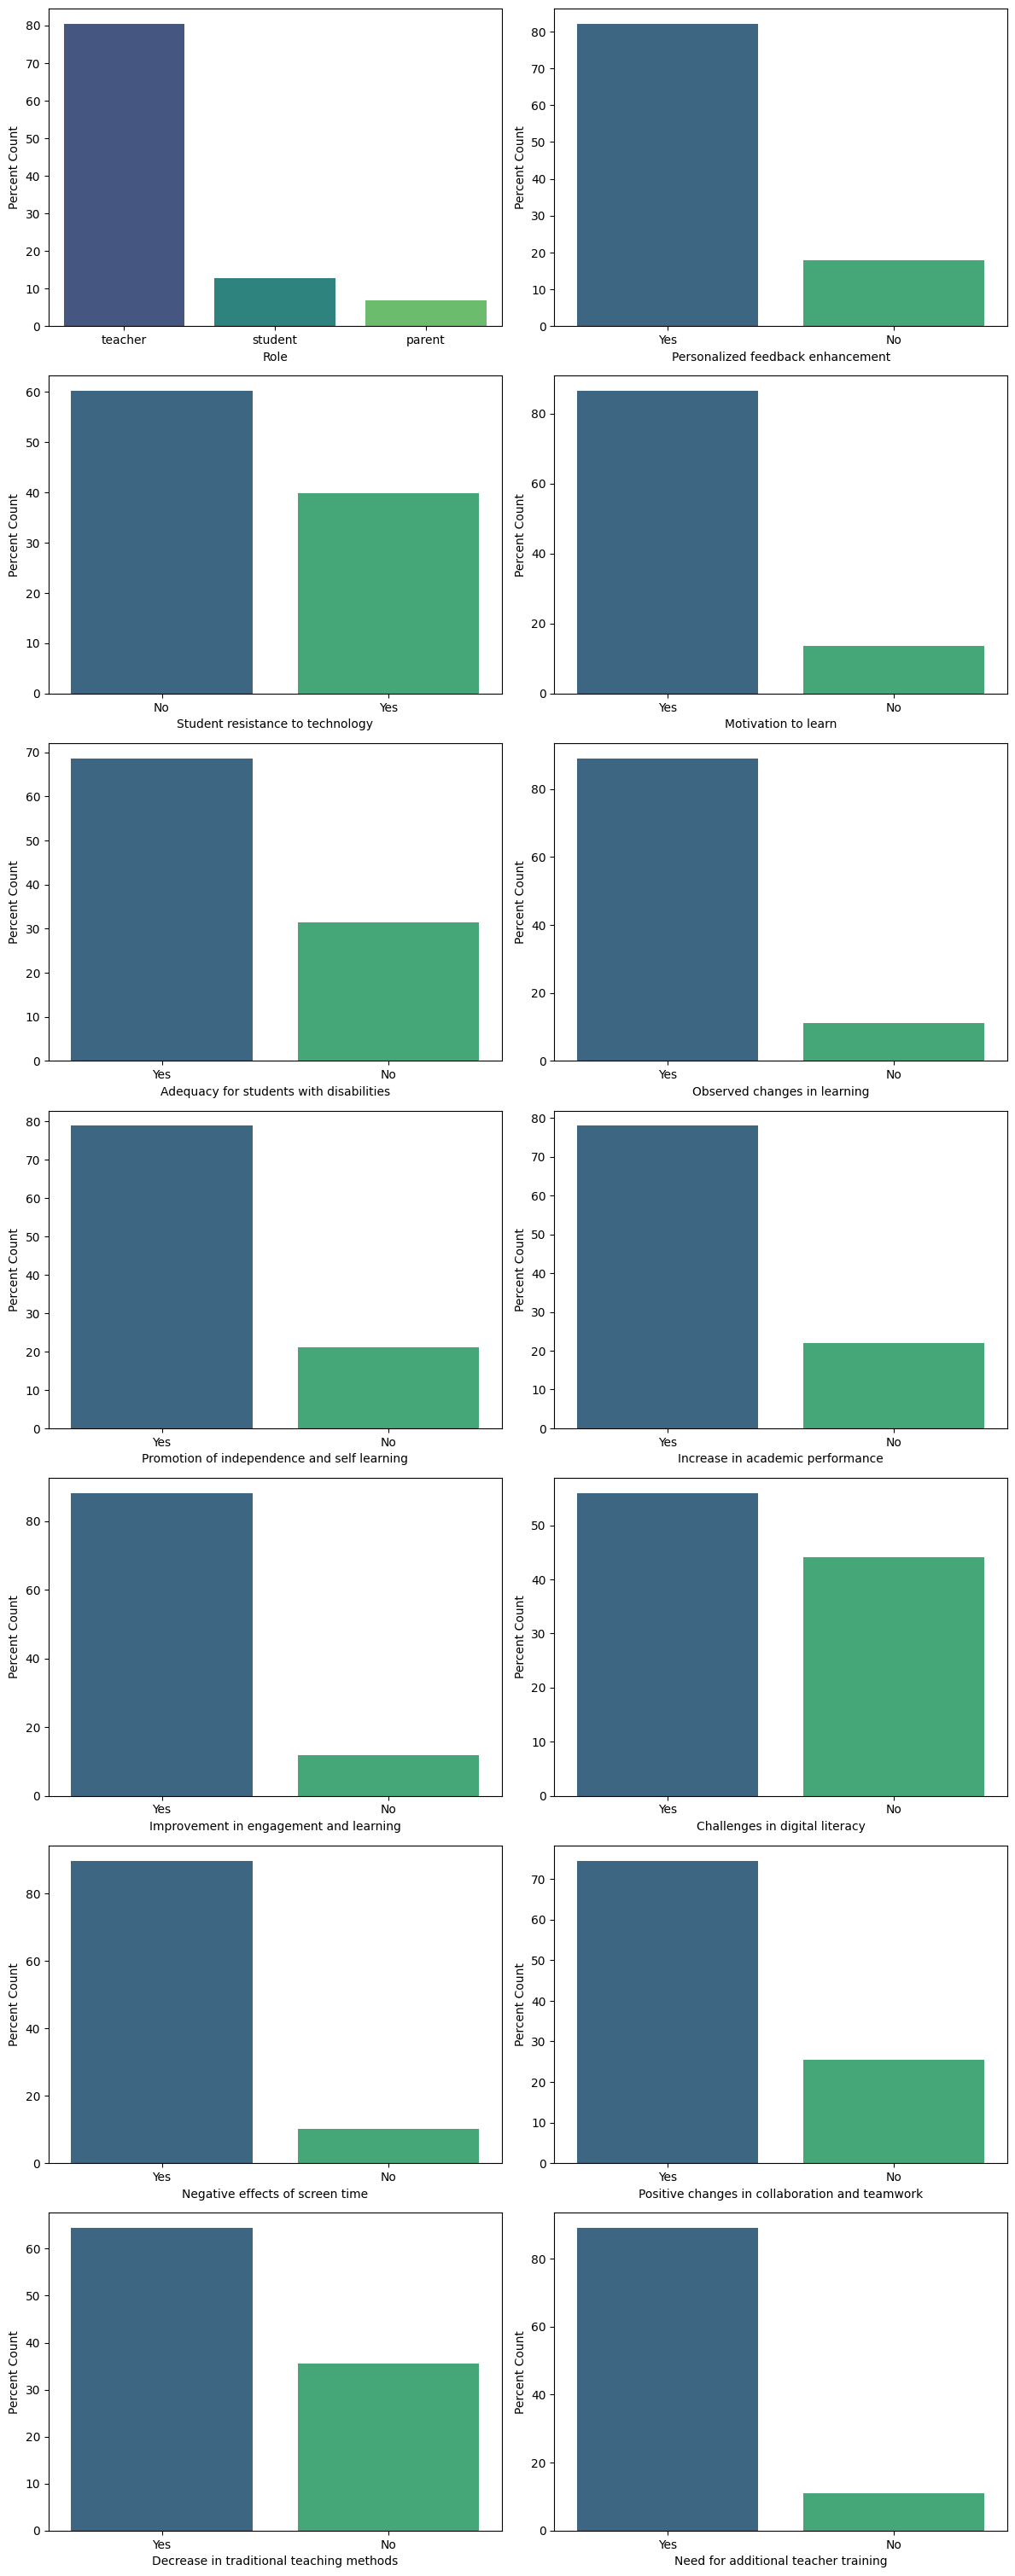

In [171]:
# Draw 'col_encoding_ordinal'
plot_categorical_variables(df, col_encoding_label, (12, 60), ylabel="Percent Count")

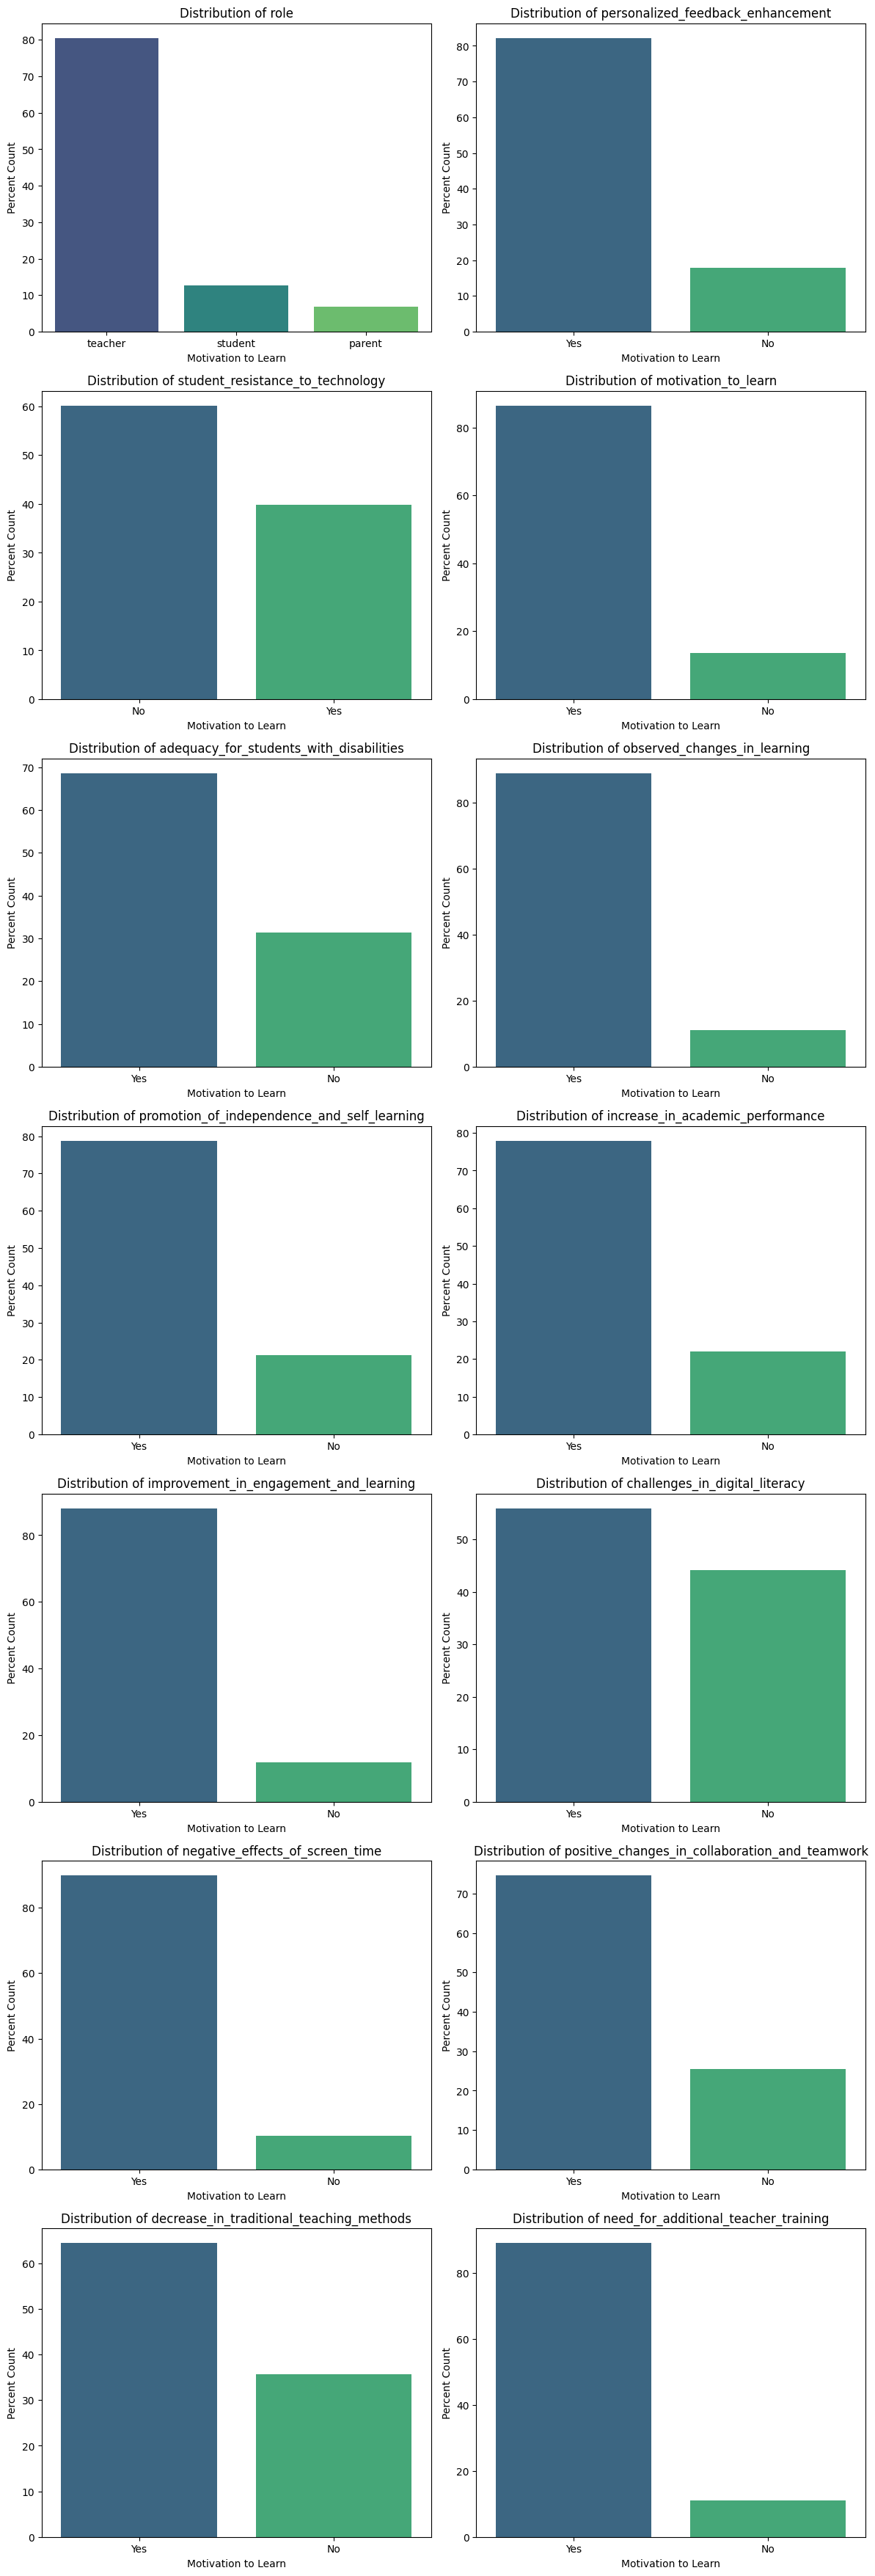

In [106]:
# Draw 'motivation_to_learn'
plot_categorical_variables(df, col_encoding_label, (12, 150), 
                              title="Distribution", ylabel="Percent Count")

In [104]:
df['perceived_enhancement_of_learning'].value_counts()

perceived_enhancement_of_learning
very          41
moderately    28
extremely     23
slightly      18
not at all     6
unknown        2
Name: count, dtype: int64

In [105]:
df['perceived_enhancement_of_learning'].value_counts(normalize=True)*100

perceived_enhancement_of_learning
very          34.745763
moderately    23.728814
extremely     19.491525
slightly      15.254237
not at all     5.084746
unknown        1.694915
Name: proportion, dtype: float64

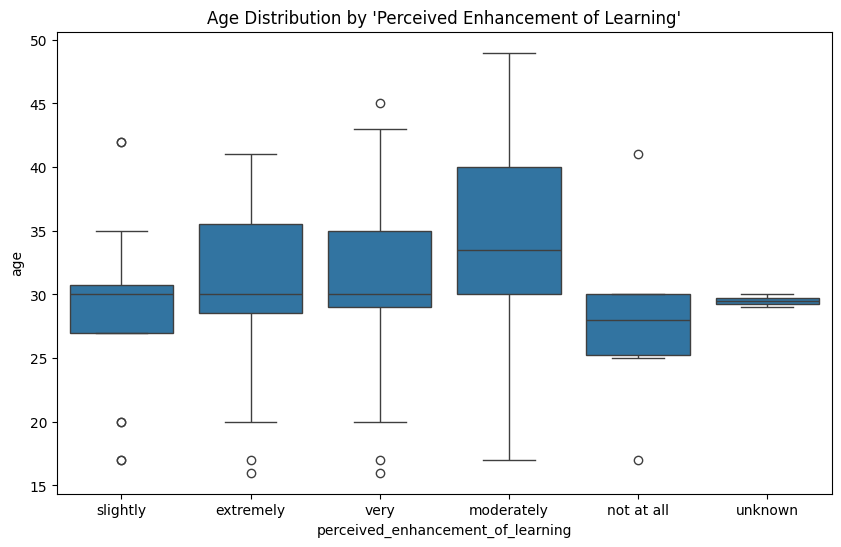

In [140]:
# Analyze relationships between the target and other features
# Relationship with 'Age'
plt.figure(figsize=(10, 6))
sns.boxplot(x="perceived_enhancement_of_learning", y="age", data=df)
plt.title("Age Distribution by 'Perceived Enhancement of Learning'")
plt.show()

In [143]:
col_encoding_ordinal

['frequency_of_technology_use', 'perceived_enhancement_of_learning']

In [130]:
df['school_location'].isnull().sum()

np.int64(0)

# Just for checking

`index=False`:

This parameter indicates that the row indices (the numbers that typically appear on the leftmost side of the DataFrame) should not be written to the Excel file. If you set index=True (or omit this parameter), the row indices would be included as a separate column in the Excel file.

In [ ]:
# Sample DataFrame
dfa = pd.DataFrame({
    'A': [1, 2, 3, -1],
    'B': [4, 5, 6, -2],
    'C': [7, 8, 9, -3],
    'D': [10, 11, 12, -4]
})
dfa

,A,B,C,D
0,1,4,7,10
1,2,5,8,11
2,3,6,9,12
3,-1,-2,-3,-4


In [ ]:
# Computes the mean of each column (since it aggregates across rows).
dfa.sum(axis=0)

,0
A,5
B,13
C,21
D,29


In [ ]:
# Computes the sum of each row (since it aggregates across columns).
dfa.sum(axis=1)

,0
0,22
1,26
2,30
3,-10


In [ ]:
# Dropping a row using axis=0 (default)
dfa.drop(index=[1,2])  # Drops row with index 1

,A,B,C,D
0,1,4,7,10
3,-1,-2,-3,-4


In [ ]:
# Dropping a column using axis=1
dfa.drop(columns=['C'], axis=1)  # Drops column 'B'

,A,B,D
0,1,4,10
1,2,5,11
2,3,6,12
3,-1,-2,-4
